## Data Visulization

In [146]:
import pandas as pd

# Load the phenotype data
phenotype_data = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')

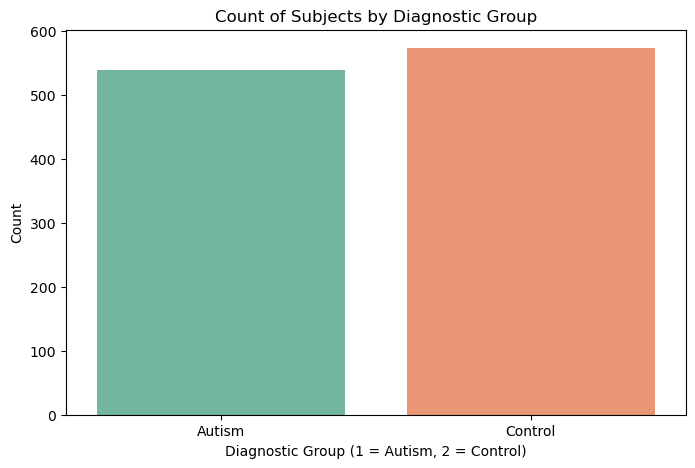

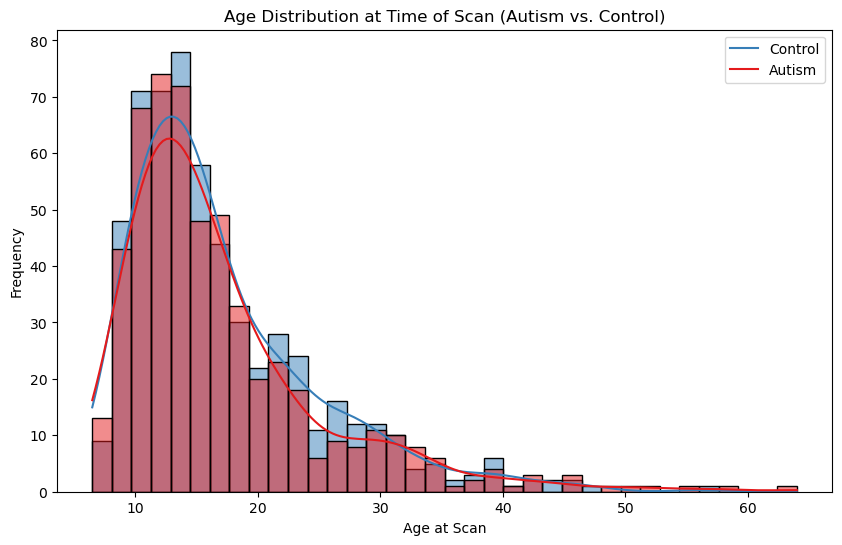

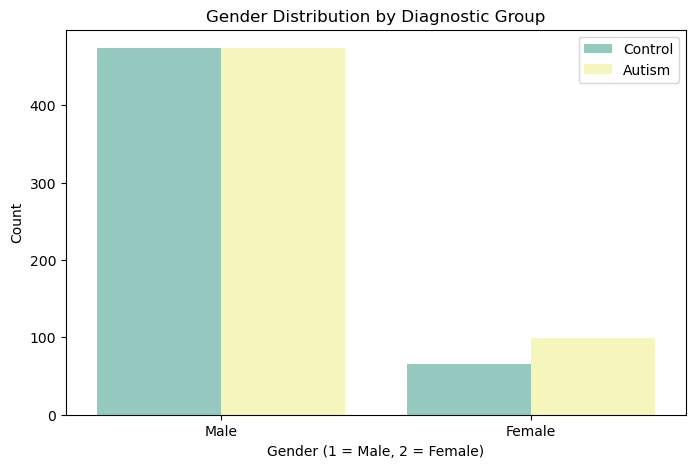

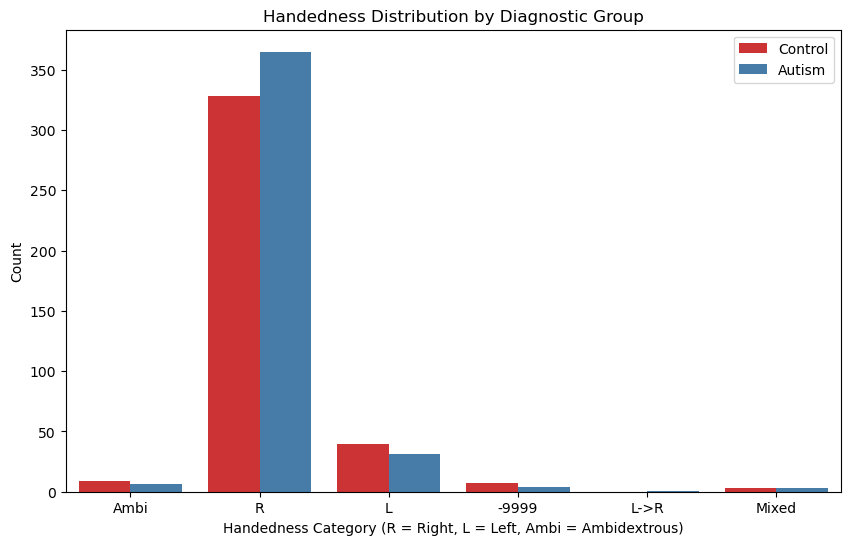

In [152]:
# Visualization 1: Bar Plot of Diagnostic Groups
plt.figure(figsize=(8, 5))
sns.countplot(data=phenotype_data, x='DX_GROUP', palette='Set2')
plt.title('Count of Subjects by Diagnostic Group')
plt.xlabel('Diagnostic Group (1 = Autism, 2 = Control)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Autism', 'Control'])
plt.show()

# Visualization 2: Age Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=phenotype_data, x='AGE_AT_SCAN', hue='DX_GROUP', kde=True, palette='Set1')
plt.title('Age Distribution at Time of Scan (Autism vs. Control)')
plt.xlabel('Age at Scan')
plt.ylabel('Frequency')
plt.legend(['Control', 'Autism'])
plt.show()

# Visualization 3: Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=phenotype_data, x='SEX', hue='DX_GROUP', palette='Set3')
plt.title('Gender Distribution by Diagnostic Group')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(['Control', 'Autism'])
plt.show()

# Visualization 4: Handedness Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=phenotype_data, x='HANDEDNESS_CATEGORY', hue='DX_GROUP', palette='Set1')
plt.title('Handedness Distribution by Diagnostic Group')
plt.xlabel('Handedness Category (R = Right, L = Left, Ambi = Ambidextrous)')
plt.ylabel('Count')
plt.legend(['Control', 'Autism'])
plt.show()


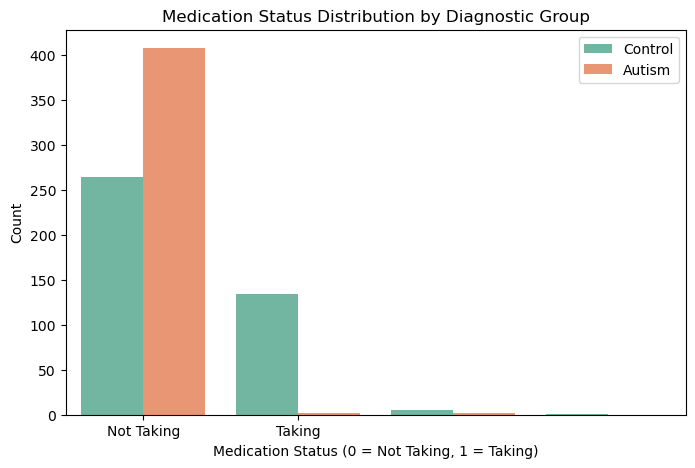

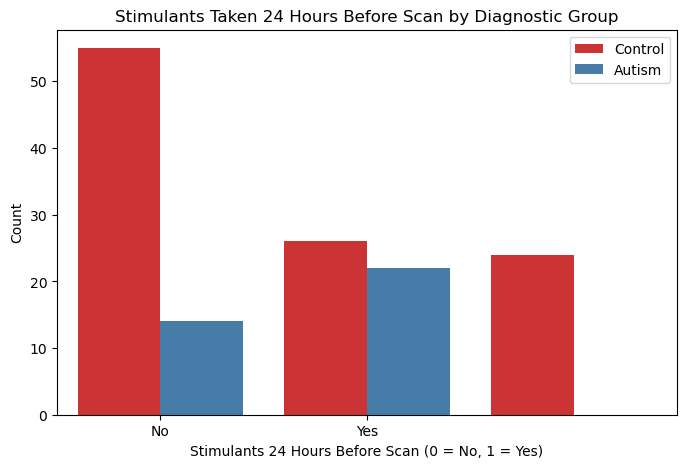

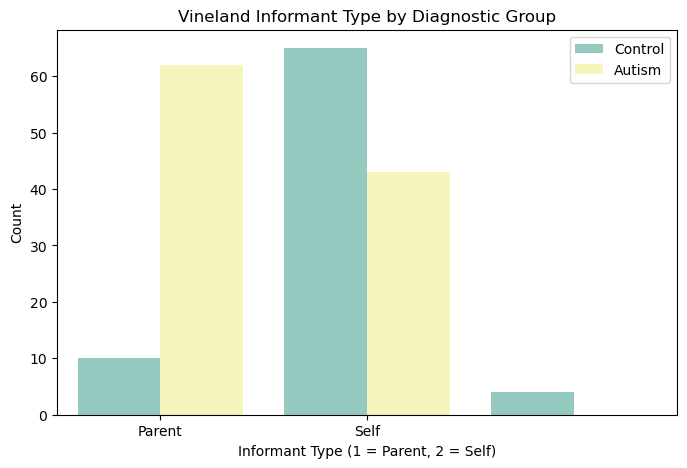

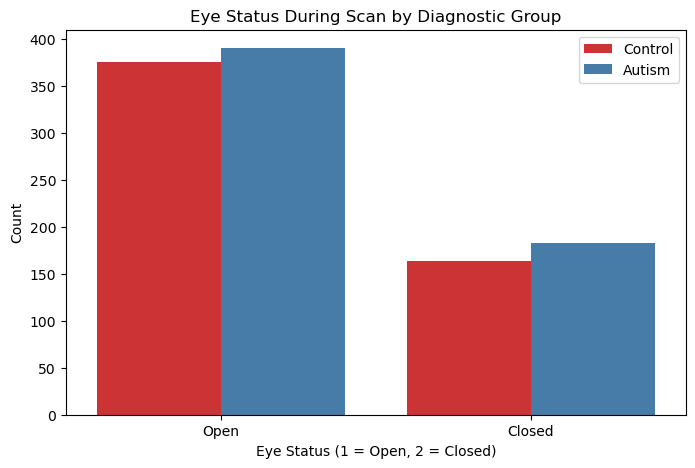

In [150]:
# Visualization 1: CURRENT_MED_STATUS - Medication Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=phenotype_data, x='CURRENT_MED_STATUS', hue='DX_GROUP', palette='Set2')
plt.title('Medication Status Distribution by Diagnostic Group')
plt.xlabel('Medication Status (0 = Not Taking, 1 = Taking)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Taking', 'Taking'])
plt.legend(['Control', 'Autism'])
plt.show()

# Visualization 2: OFF_STIMULANTS_AT_SCAN - Stimulants Taken Before Scan
plt.figure(figsize=(8, 5))
sns.countplot(data=phenotype_data, x='OFF_STIMULANTS_AT_SCAN', hue='DX_GROUP', palette='Set1')
plt.title('Stimulants Taken 24 Hours Before Scan by Diagnostic Group')
plt.xlabel('Stimulants 24 Hours Before Scan (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['Control', 'Autism'])
plt.show()

# Visualization 3: VINELAND_INFORMANT - Informant Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=phenotype_data, x='VINELAND_INFORMANT', hue='DX_GROUP', palette='Set3')
plt.title('Vineland Informant Type by Diagnostic Group')
plt.xlabel('Informant Type (1 = Parent, 2 = Self)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Parent', 'Self'])
plt.legend(['Control', 'Autism'])
plt.show()

# Visualization 4: EYE_STATUS_AT_SCAN - Eye Status During Scan
plt.figure(figsize=(8, 5))
sns.countplot(data=phenotype_data, x='EYE_STATUS_AT_SCAN', hue='DX_GROUP', palette='Set1')
plt.title('Eye Status During Scan by Diagnostic Group')
plt.xlabel('Eye Status (1 = Open, 2 = Closed)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Open', 'Closed'])
plt.legend(['Control', 'Autism'])
plt.show()

## Step 1: Read the file and visualize the lower triangular part

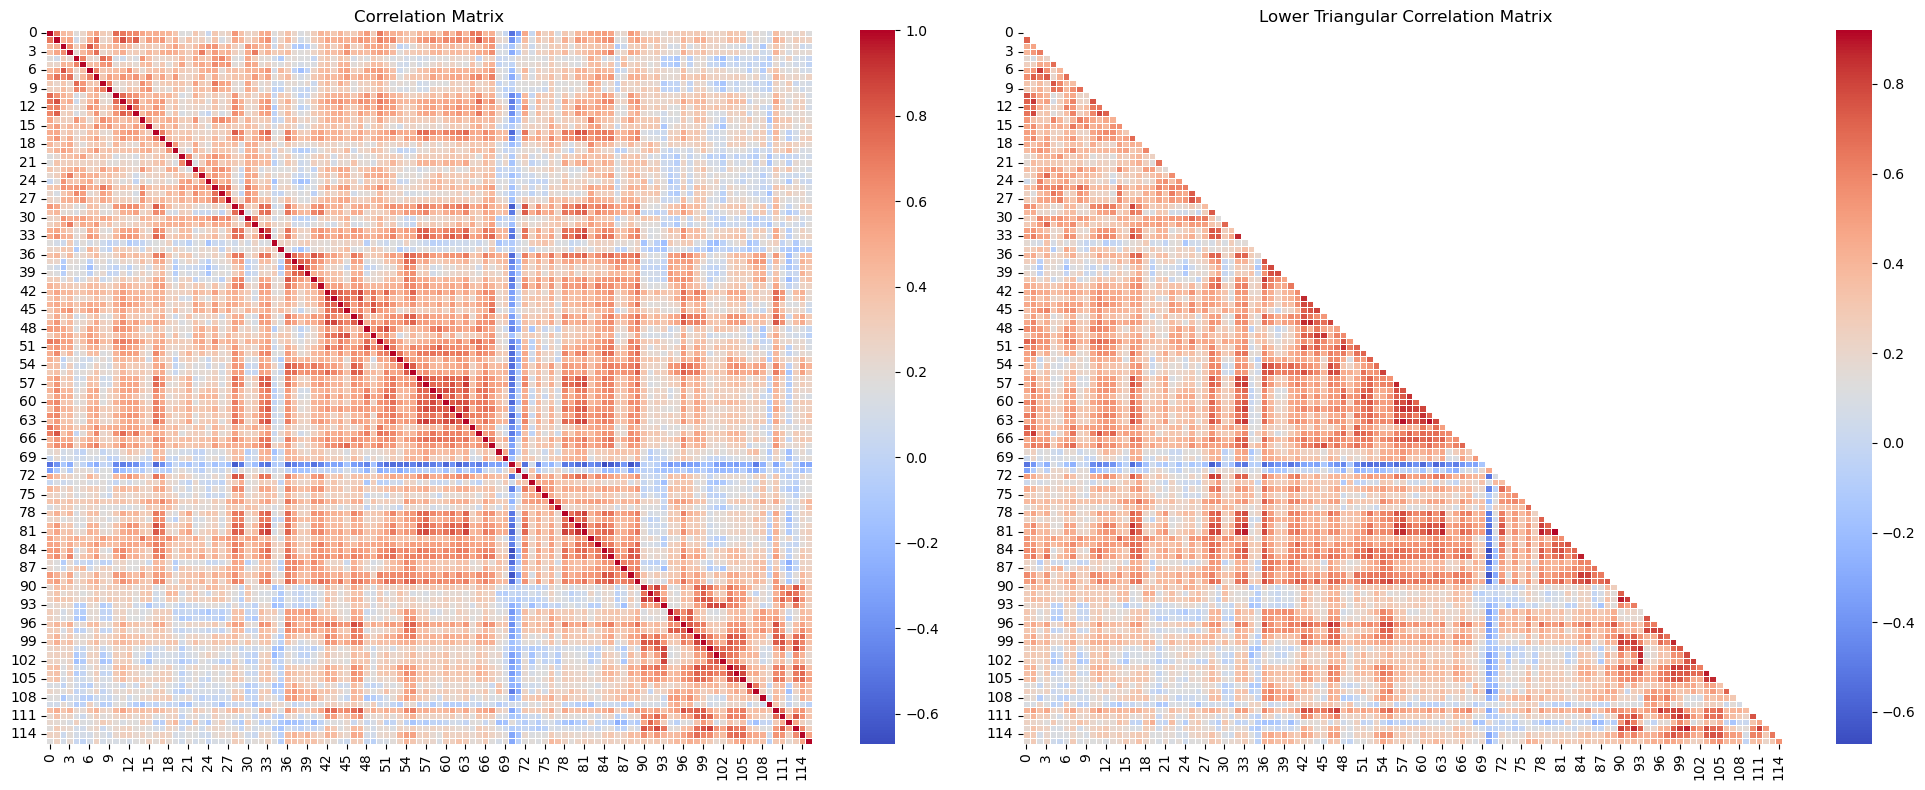

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the .1D file, skip non-numeric lines (lines starting with '#')
data = pd.read_csv('rois_aal/Caltech_0051456_rois_aal.1D', delim_whitespace=True, header=None, comment='#')

# Ensure that all columns are numeric by converting to numeric values, coercing non-convertible values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns that contain all NaN values (if any exist due to conversion)
data = data.dropna(axis=1, how='all')
data = data.dropna(axis=0, how='all')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure for two side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Full correlation matrix heatmap (left side)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, ax=axs[0])
axs[0].set_title('Correlation Matrix')

# Lower triangular correlation matrix heatmap (right side)
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5, ax=axs[1])
axs[1].set_title('Lower Triangular Correlation Matrix')

# Display both heatmaps
plt.tight_layout()
plt.show()


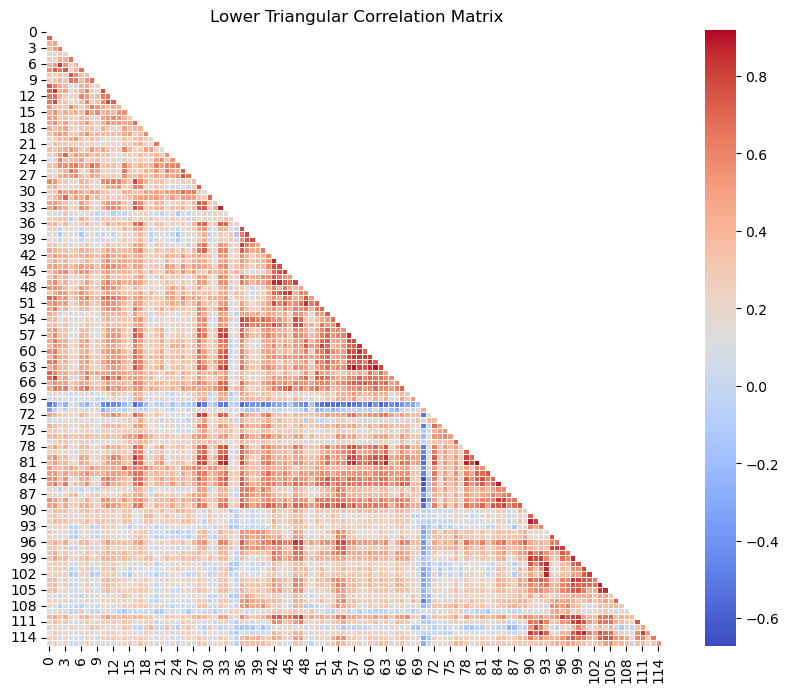

In [100]:
# Create a mask for the upper triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize only the lower triangular part
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)


# Set title for the heatmap
plt.title('Lower Triangular Correlation Matrix')

# Display the heatmap
plt.show()

In [21]:
import pandas as pd
import os

# Path where your files are located
data_dir = 'rois_aal/'  # Update this to your directory

# Load and inspect the first file
for file_name in os.listdir(data_dir):
    if file_name.endswith(".1D"):
        file_path = os.path.join(data_dir, file_name)
        
        # Load the data
        data = pd.read_csv(file_path, delim_whitespace=True, header=None)
        
        # Print the first few rows of data
        print(f"Data from file: {file_name}")
        print(data.head())  # Print the first few rows for inspection
        
        break  # We are only inspecting one file for now


Data from file: Pitt_0050038_rois_aal.1D
                    0                    1                      2    \
0                 #2001                #2002                  #2101   
1  -0.45363301038742065  -1.4986380338668823  -0.016733000054955482   
2  -0.03071100078523159  -0.4389300048351288   -0.04076100140810013   
3   0.22229400277137756  0.30951398611068726    -0.4121299982070923   
4    1.3534929752349854   0.8688099980354309    -0.6837850213050842   

                     3                    4                     5    \
0                  #2102                #2111                 #2112   
1    -0.8796780109405518  -0.7383670210838318   -0.4513700008392334   
2   -0.43827399611473083    1.520848035812378  0.058428000658750534   
3  -0.041868001222610474   0.1914529949426651  0.024586999788880348   
4    -0.6482840180397034    1.214197039604187   0.23938000202178955   

                     6                     7                     8    \
0                  #2201         

## Step 2: Extract the lower triangular part and convert the data into 1D file and save it in CSV file

In [22]:
import numpy as np
import pandas as pd
import os

# Path where your files are located
data_dir = 'rois_aal/'  # Update this to your directory

# Function to calculate lower triangular part of the correlation matrix
def extract_lower_triangular(data):
    # Ensure that all data is numeric
    data = data.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN
    data = data.dropna(axis=1, how='any')  # Drop columns with NaN values
    
    # Check if we have enough columns left for correlation
    if data.shape[1] > 1:
        correlation_matrix = np.corrcoef(data, rowvar=False)
        lower_triangular = correlation_matrix[np.tril_indices(correlation_matrix.shape[0], k=-1)]
        return lower_triangular
    else:
        return np.array([])  # Return an empty array if not enough data

# Initialize an empty list to store dataframes
dfs = []

# Loop over all files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith(".1D"):
        file_path = os.path.join(data_dir, file_name)
        
        # Step 1: Load your data file and skip header lines starting with '#'
        data = pd.read_csv(file_path, delim_whitespace=True, header=None, comment='#')
        
        # Step 2: Extract lower triangular part of the correlation matrix
        lower_triangular = extract_lower_triangular(data)
        
        if lower_triangular.size > 0:  # Proceed only if we got a valid result
            # Step 3: Convert the lower triangular part into a DataFrame
            lower_tri_df = pd.DataFrame(lower_triangular).T  # Transpose to get one row
            
            # Step 4: Add a new column with the filename
            lower_tri_df['filename'] = file_name
            
            # Step 5: Append the dataframe to the list
            dfs.append(lower_tri_df)

# Step 6: Concatenate all the dataframes into one
if dfs:
    final_df = pd.concat(dfs, ignore_index=True)

    # Step 7: Save the final dataframe to a CSV
    final_df.to_csv('lower_triangular_with_filenames.csv', index=False)

    print("Process completed. The final dataframe has been saved.")
else:
    print("No valid data to process.")


/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c

Process completed. The final dataframe has been saved.


In [127]:
data = pd.read_csv('lower_triangular_with_filenames.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,3996,3997,3998,3999,4000,4001,4002,4003,4004,filename
0,0.749765,0.588455,0.434005,0.454054,0.526429,0.527052,0.516009,0.395350,0.291751,0.294732,...,0.767574,0.772596,0.702533,0.729324,0.838128,0.857823,0.643536,0.647438,0.844792,Pitt_0050038_rois_aal.1D
1,0.758343,0.529224,0.493568,0.148522,0.247306,0.235989,0.467698,0.411689,0.751824,0.109162,...,0.378925,0.405804,0.623337,0.511341,0.514941,0.583765,0.410875,0.401126,0.729343,NYU_0051042_rois_aal.1D
2,0.848247,0.676783,0.534533,0.645748,0.623988,0.802162,0.575985,0.514913,0.580060,0.633346,...,0.644513,0.588242,0.814086,0.799624,0.718145,0.720611,0.420149,0.637590,0.844762,UM_2_0050391_rois_aal.1D
3,0.641416,0.543764,0.562983,0.337802,0.570790,0.664645,0.332540,0.374055,0.696599,0.554487,...,0.082386,0.355969,0.188725,0.551823,0.185216,0.494288,0.363499,0.534925,0.663875,USM_0050497_rois_aal.1D
4,0.745226,0.705488,0.542872,0.617447,0.572820,0.736628,0.406145,0.391962,0.389770,0.268711,...,0.133797,0.233606,0.556629,0.453388,0.416345,0.617632,0.594662,0.712476,0.652294,UM_1_0050379_rois_aal.1D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.836954,0.750029,0.686267,0.619275,0.667697,0.734536,0.509913,0.447580,0.683167,0.515841,...,0.308723,0.389714,0.547929,0.619874,0.617967,0.637028,0.427224,0.454789,0.813014,UM_1_0050362_rois_aal.1D
880,0.416830,0.114394,0.020068,0.173016,0.177339,0.576756,0.146756,0.165407,0.500755,0.489372,...,0.149795,0.131315,0.351879,0.402420,0.394751,0.392806,0.143459,0.396544,0.414588,NYU_0051059_rois_aal.1D
881,0.884996,0.794185,0.822835,0.795525,0.817682,0.859963,0.595237,0.602666,0.659476,0.656505,...,0.476892,0.682883,0.767416,0.839417,0.871725,0.833809,0.514915,0.638033,0.898376,Pitt_0050023_rois_aal.1D
882,0.378495,0.660816,0.479365,0.291064,0.323011,0.468407,0.268684,0.458264,0.567088,0.233397,...,0.070527,0.080569,0.586047,0.424492,0.582477,0.342777,0.556404,0.663510,0.670549,Trinity_0050263_rois_aal.1D


## Extract the subject id from the file name

In [128]:
import pandas as pd

# Assuming 'final_df' is the dataframe we created earlier with the filenames
def extract_subject_id(filename):
    # Remove '_rois_aal.1D' from the filename
    base_name = filename.replace('_rois_aal.1D', '')
    
    # Extract the last 5 digits
    subject_id = base_name[-5:]
    
    return subject_id

# Apply the function to the 'filename' column and create a new 'subject_id' column
data['subject_id'] = data['filename'].apply(extract_subject_id)

# Display the updated dataframe
data


,0,1,2,3,4,5,6,7,8,9,...,3997,3998,3999,4000,4001,4002,4003,4004,filename,subject_id
0,0.749765,0.588455,0.434005,0.454054,0.526429,0.527052,0.516009,0.395350,0.291751,0.294732,...,0.772596,0.702533,0.729324,0.838128,0.857823,0.643536,0.647438,0.844792,Pitt_0050038_rois_aal.1D,50038
1,0.758343,0.529224,0.493568,0.148522,0.247306,0.235989,0.467698,0.411689,0.751824,0.109162,...,0.405804,0.623337,0.511341,0.514941,0.583765,0.410875,0.401126,0.729343,NYU_0051042_rois_aal.1D,51042
2,0.848247,0.676783,0.534533,0.645748,0.623988,0.802162,0.575985,0.514913,0.580060,0.633346,...,0.588242,0.814086,0.799624,0.718145,0.720611,0.420149,0.637590,0.844762,UM_2_0050391_rois_aal.1D,50391
3,0.641416,0.543764,0.562983,0.337802,0.570790,0.664645,0.332540,0.374055,0.696599,0.554487,...,0.355969,0.188725,0.551823,0.185216,0.494288,0.363499,0.534925,0.663875,USM_0050497_rois_aal.1D,50497
4,0.745226,0.705488,0.542872,0.617447,0.572820,0.736628,0.406145,0.391962,0.389770,0.268711,...,0.233606,0.556629,0.453388,0.416345,0.617632,0.594662,0.712476,0.652294,UM_1_0050379_rois_aal.1D,50379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.836954,0.750029,0.686267,0.619275,0.667697,0.734536,0.509913,0.447580,0.683167,0.515841,...,0.389714,0.547929,0.619874,0.617967,0.637028,0.427224,0.454789,0.813014,UM_1_0050362_rois_aal.1D,50362
880,0.416830,0.114394,0.020068,0.173016,0.177339,0.576756,0.146756,0.165407,0.500755,0.489372,...,0.131315,0.351879,0.402420,0.394751,0.392806,0.143459,0.396544,0.414588,NYU_0051059_rois_aal.1D,51059
881,0.884996,0.794185,0.822835,0.795525,0.817682,0.859963,0.595237,0.602666,0.659476,0.656505,...,0.682883,0.767416,0.839417,0.871725,0.833809,0.514915,0.638033,0.898376,Pitt_0050023_rois_aal.1D,50023
882,0.378495,0.660816,0.479365,0.291064,0.323011,0.468407,0.268684,0.458264,0.567088,0.233397,...,0.080569,0.586047,0.424492,0.582477,0.342777,0.556404,0.663510,0.670549,Trinity_0050263_rois_aal.1D,50263


## Merge the data on the basis of subject id to get the target variable

In [129]:
import pandas as pd

# Load the final_df and Phenotypic file
phenotypic_df = pd.read_csv('Phenotypic_V1_0b_preprocessed1.csv')

# Convert 'subject_id' columns in both DataFrames to string
final_df['subject_id'] = final_df['subject_id'].astype(str)
phenotypic_df['SUB_ID'] = phenotypic_df['SUB_ID'].astype(str)

# Rename the column in phenotypic_df to match 'subject_id' in final_df
phenotypic_df.rename(columns={'SUB_ID': 'subject_id'}, inplace=True)

# Merge the two DataFrames on 'subject_id'
merged_df = pd.merge(final_df, phenotypic_df[['subject_id', 'DX_GROUP']], on='subject_id', how='left')

# Create a new column 'autism', where 1 represents autism and 0 represents control
merged_df['autism'] = merged_df['DX_GROUP'].apply(lambda x: 1 if x == 1 else 0)

# Drop the 'DX_GROUP' column as it's no longer needed
merged_df.drop(columns=['DX_GROUP'], inplace=True)

In [130]:
merged_df

,0,1,2,3,4,5,6,7,8,9,...,6663,6664,6665,6666,6667,6668,6669,filename,subject_id,autism
0,0.749765,0.588455,0.434005,0.454054,0.526429,0.527052,0.516009,0.395350,0.291751,0.294732,...,-0.054532,-0.072383,0.002186,0.077496,0.035623,0.058967,0.061097,Pitt_0050038_rois_aal.1D,50038,0
1,0.758343,0.529224,0.493568,0.148522,0.247306,0.235989,0.467698,0.411689,0.751824,0.109162,...,0.197183,-0.014012,-0.199378,-0.233027,-0.072404,-0.077572,0.496298,NYU_0051042_rois_aal.1D,51042,0
2,0.848247,0.676783,0.534533,0.645748,0.623988,0.802162,0.575985,0.514913,0.580060,0.633346,...,0.337923,0.124427,0.339073,0.401616,0.382144,0.399544,0.585456,UM_2_0050391_rois_aal.1D,50391,0
3,0.641416,0.543764,0.562983,0.337802,0.570790,0.664645,0.332540,0.374055,0.696599,0.554487,...,0.391767,0.220944,0.173699,0.318540,0.222863,0.298256,0.362448,USM_0050497_rois_aal.1D,50497,1
4,0.745226,0.705488,0.542872,0.617447,0.572820,0.736628,0.406145,0.391962,0.389770,0.268711,...,0.316283,0.192546,-0.128335,-0.346723,-0.117684,-0.456460,0.458041,UM_1_0050379_rois_aal.1D,50379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.836954,0.750029,0.686267,0.619275,0.667697,0.734536,0.509913,0.447580,0.683167,0.515841,...,-0.004015,-0.041715,0.152317,0.197755,0.140152,0.236967,0.508293,UM_1_0050362_rois_aal.1D,50362,0
880,0.416830,0.114394,0.020068,0.173016,0.177339,0.576756,0.146756,0.165407,0.500755,0.489372,...,0.219549,0.034492,0.170878,0.017781,-0.015369,-0.054446,0.258832,NYU_0051059_rois_aal.1D,51059,0
881,0.884996,0.794185,0.822835,0.795525,0.817682,0.859963,0.595237,0.602666,0.659476,0.656505,...,0.363633,0.279505,0.155824,0.161091,0.135369,0.210986,0.249700,Pitt_0050023_rois_aal.1D,50023,1
882,0.378495,0.660816,0.479365,0.291064,0.323011,0.468407,0.268684,0.458264,0.567088,0.233397,...,0.143768,-0.056720,0.239379,0.247574,0.323783,0.455303,0.449990,Trinity_0050263_rois_aal.1D,50263,0


In [66]:
# Save the merged DataFrame to a CSV file
data.to_csv('merged_data_with_autism.csv', index=False)

print("The merged DataFrame has been saved as 'merged_data_with_autism.csv'.")


The merged DataFrame has been saved as 'merged_data_with_autism.csv'.


In [131]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data = pd.read_csv('merged_data_with_autism.csv')
# Drop 'filename' and 'subject_id' columns
data_cleaned = data.drop(columns=['filename', 'subject_id'])

# Separate features (X) and target (y)
X = data_cleaned.drop(columns=['autism']).values
y = data_cleaned['autism'].values


KeyError: "['filename', 'subject_id'] not found in axis"

## Data Preprocessing

In [ ]:
# Replace NaN values with the mean of the respective column in both training and testing sets
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
data.isnull().sum()

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming your data is in a DataFrame called 'data'

# Create an imputer object that will fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform the data to fill NaN values with the mean
data_imputed = imputer.fit_transform(data)

# If you want to convert the data back into a DataFrame (after imputation)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Now 'data_imputed' contains the data with NaN values filled with the column means

In [132]:
data = data_imputed

In [144]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Separate features and target (assuming the last column is the target)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # Last column is the target

# Step 2: Feature scaling (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## SVM Model

In [ ]:
# Step 4: Build the SVM model with probability=True to get probability estimates for ROC AUC
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Step 5: Train the model
svm_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Compute ROC curve and AUC
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 9: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   6.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.528 total time=   5.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   5.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   5.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   5.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.585 total time=   5.9s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.669 total time=   5.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.660 total time=   6.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.546 total time=   7.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.574 total time=   5.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.528 total time=   5.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.528 total time=   5.6s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.525 total time=   5.6s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.525 total time=   5.6s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.525 total time=   5.6s
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.585 total time=   4.8s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.669 total time=   4.8s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.660 total time=   5.4s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.546 total time=   5.3s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.574 total time=   5.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.535 total time=   5.7s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.528 total time=   5.6s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.525 total time=   5.6s
[CV 4/5] END .....C=10, gamm

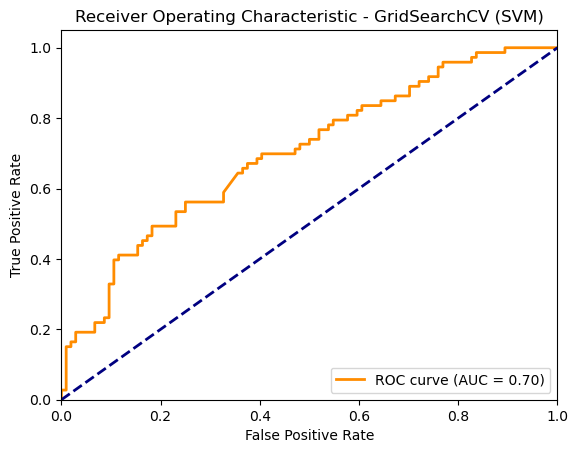

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Define a set of hyperparameters for GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

# Step 2: Modify SVC to enable probability estimation (probability=True)
svc = SVC(probability=True)

# Step 3: Perform Grid Search
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Step 4: Print best parameters from Grid Search
print("Best parameters found by GridSearch:", grid.best_params_)

# Step 5: Predict using the best model
y_pred_grid = grid.predict(X_test)

# Evaluate the model
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy with best parameters: {accuracy_grid * 100:.2f}%')

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_grid))

# Step 6: Compute ROC curve and AUC using the best estimator
y_pred_prob_grid = grid.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_pred_prob_grid)
roc_auc_grid = auc(fpr_grid, tpr_grid)

# Step 7: Plot ROC curve
plt.figure()
plt.plot(fpr_grid, tpr_grid, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_grid:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - GridSearchCV (SVM)')
plt.legend(loc="lower right")
plt.show()


## Random Forest

Random Forest Accuracy: 61.02%

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68       104
         1.0       0.53      0.47      0.50        73

    accuracy                           0.61       177
   macro avg       0.59      0.59      0.59       177
weighted avg       0.60      0.61      0.61       177


Random Forest Confusion Matrix:
[[74 30]
 [39 34]]


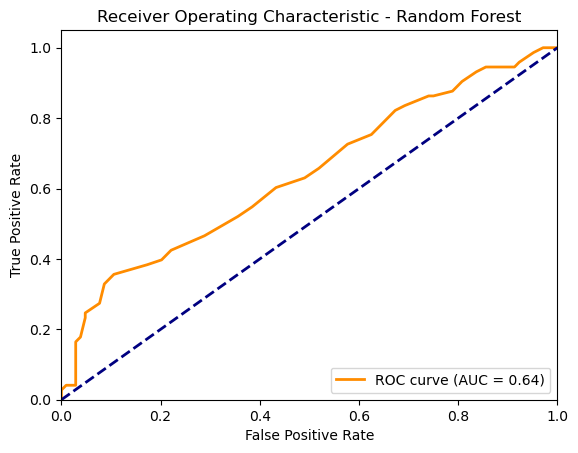

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Build the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Classification report and confusion matrix
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Step 4: Compute ROC curve and AUC
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Step 5: Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


## Logistic Regression

Logistic Regression Accuracy: 63.28%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       104
         1.0       0.54      0.67      0.60        73

    accuracy                           0.63       177
   macro avg       0.63      0.64      0.63       177
weighted avg       0.65      0.63      0.64       177


Logistic Regression Confusion Matrix:
[[63 41]
 [24 49]]


/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


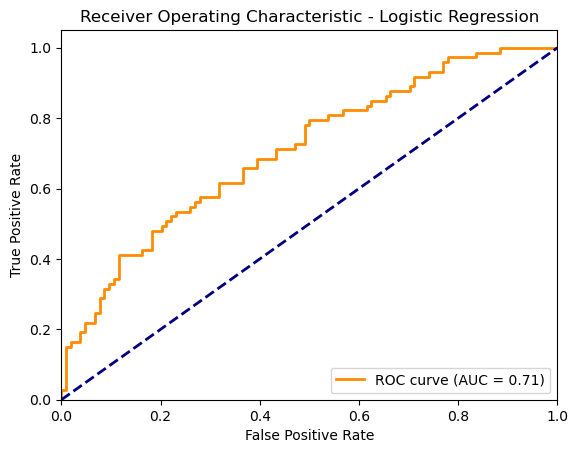

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Build the logistic regression model
log_reg_model = LogisticRegression(random_state=42)

# Step 2: Train the model
log_reg_model.fit(X_train, y_train)

# Step 3: Predict and evaluate
y_pred_log = log_reg_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log * 100:.2f}%')

# Classification report and confusion matrix
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Step 4: Compute ROC curve and AUC
y_pred_prob_log = log_reg_model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Step 5: Plot ROC curve
plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


## Neural Networks

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and the target (y)
X = data.drop(columns=['autism'])
y = data['autism']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Apply StandardScaler to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the shape of the processed data
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((707, 6670), (177, 6670), (707,), (177,))

## LSTM

In [143]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Reshape the data to 3D for LSTM [samples, timesteps, features]
# Here we assume each sample is treated as a single time step
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Binary classification

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
# Optionally, you can use EarlyStopping:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])

# Using learning rate scheduler:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test), callbacks=[lr_scheduler])


/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 64)             │     1,724,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,724,225 (6.58 MB)

 Trainable params: 1,724,225 (6.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5479 - loss: 1.1841 - val_accuracy: 0.5537 - val_loss: 1.1620 - learning_rate: 1.0000e-04
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6724 - loss: 1.0724 - val_accuracy: 0.6045 - val_loss: 1.1343 - learning_rate: 1.0000e-04
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8055 - loss: 1.0000 - val_accuracy: 0.6045 - val_loss: 1.1137 - learning_rate: 1.0000e-04
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8552 - loss: 0.9342 - val_accuracy: 0.5819 - val_loss: 1.1093 - learning_rate: 1.0000e-04
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8698 - loss: 0.9006 - val_accuracy: 0.6271 - val_loss: 1.0871 - learning_rate: 1.0000e-04
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9177 - loss: 0.8352 - val_accuracy: 0.6441 - val_loss: 1.0746 - learning_rate: 1.0000e-04
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9181 - 

In [138]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test_lstm)

# Since the model predicts probabilities, we need to convert these to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print precision, recall, and f1-score using classification_report
print(classification_report(y_test, y_pred_binary))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65        93
         1.0       0.61      0.62      0.62        84

    accuracy                           0.63       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.63      0.63      0.63       177



## RNN

In [139]:
from tensorflow.keras.layers import SimpleRNN

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(128, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/20


/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5597 - loss: 1.1818 - val_accuracy: 0.4802 - val_loss: 1.5822
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6687 - loss: 1.0457 - val_accuracy: 0.5593 - val_loss: 0.9467
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7365 - loss: 0.9510 - val_accuracy: 0.5593 - val_loss: 1.0519
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - loss: 0.5904 - val_accuracy: 0.5480 - val_loss: 0.9887
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8156 - loss: 0.5743 - val_accuracy: 0.6271 - val_loss: 0.9510
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8216 - loss: 0.5522 - val_accuracy: 0.5593 - val_loss: 1.0666
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8719 - loss: 0.4553 - val_accuracy: 0.5706 - val_loss: 1.5360
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8446 - loss: 0.5243 - val_accuracy: 0.6045 - val_loss: 1.2078
Epo

In [140]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = rnn_model.predict(X_test_lstm)

# Since the model predicts probabilities, we need to convert these to binary labels (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print precision, recall, and f1-score using classification_report
print(classification_report(y_test, y_pred_binary))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
              precision    recall  f1-score   support

         0.0       0.63      0.61      0.62        93
         1.0       0.59      0.61      0.60        84

    accuracy                           0.61       177
   macro avg       0.61      0.61      0.61       177
weighted avg       0.61      0.61      0.61       177



## CNN

In [141]:
# Build the CNN model with kernel size of 1
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=1))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/20


/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5327 - loss: 1.0243 - val_accuracy: 0.5932 - val_loss: 0.8307
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.5682 - val_accuracy: 0.5028 - val_loss: 1.4693
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7864 - loss: 0.5580 - val_accuracy: 0.5706 - val_loss: 1.4012
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.5353 - val_accuracy: 0.5480 - val_loss: 1.4827
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8905 - loss: 0.2882 - val_accuracy: 0.6158 - val_loss: 0.9199
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9211 - loss: 0.2248 - val_accuracy: 0.6328 - val_loss: 1.0255
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.2385 - val_accuracy: 0.6328 - val_loss: 1.1306
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9523 - loss: 0.1874 - val_accuracy: 0.5593 - val_loss: 1.1927
Epo

## ROC Curve

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


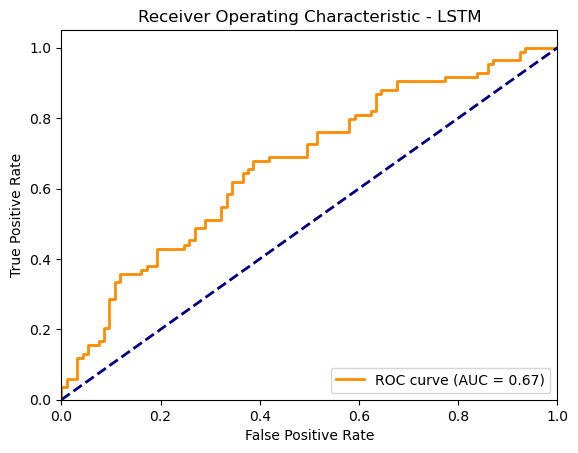

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


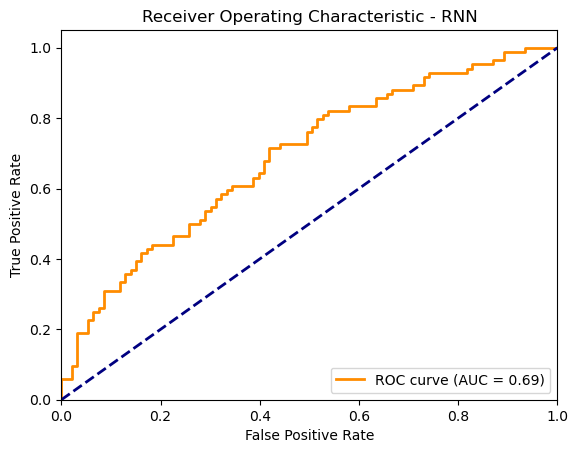

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


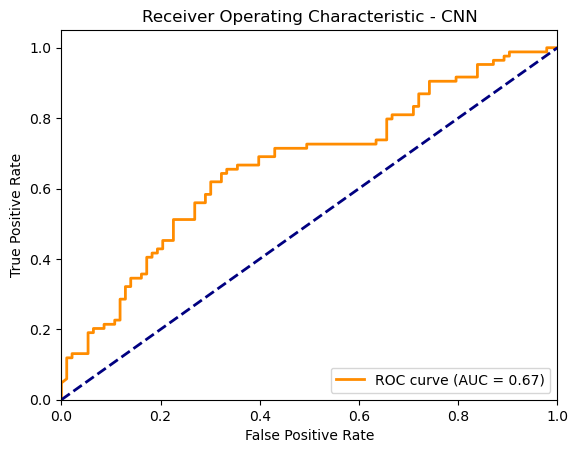

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot the ROC curve for a model
def plot_roc_auc(model, X_test, y_test, model_name):
    # Predict probabilities
    y_pred_prob = model.predict(X_test).ravel()

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Call this function for each of your models
# For LSTM (assuming X_test_lstm is reshaped for LSTM)
plot_roc_auc(model, X_test_lstm, y_test, "LSTM")

# For RNN
plot_roc_auc(rnn_model, X_test_lstm, y_test, "RNN")

# For CNN (assuming X_test_cnn is reshaped for CNN)
plot_roc_auc(cnn_model, X_test_lstm, y_test, "CNN")

